# Imports
Imports for the project will be updated as we go along.<br>
The rquired libraries and modules will be imported as needed.

In [42]:
import datetime
import numpy as np
import pandas as pd
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, RandomizedSearchCV

plt.style.use('seaborn-darkgrid')
plt.rcParams.update({'font.size': 14})

# Data
I have used the data from John Hopkins University which they have provided on GitHub [**https://github.com/CSSEGISandData/COVID-19.git**]
This data gets updated on constant, frequent intervals (mostly on day-to-day basis).
To access this data, instead of downloading the entire datasets, we can simply link to the files that are available on github and access the data directly without the need for any downloads or local dataset files.

However, we will need to manually change the dates in the data imports.<br>
Just to be safe and avoid any anomalies in the data, We will use data that is two to three days old for reliability.<br>
In the imports for the dataframes from John Hopkins University (ie. latest_data and us_medical_data) we will be using the last updates from two days before.<br>
In the imports for Apple inc. data, (ie. the mobility and analytics from Apple inc. [**https://covid19.apple.com/mobility**]) we will be using data from three days before.

In [2]:
confirmedDf = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deathsDf = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveriesDf = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latestData = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/09-27-2020.csv')
usMedicalData = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/09-27-2020.csv')
appleMobility = pd.read_csv('https://covid19-static.cdn-apple.com/covid19-mobility-data/2017HotfixDev19/v3/en-us/applemobilitytrends-2020-09-26.csv')

C:\Users\Siddhant\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
confirmedDf.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,39044,39074,39096,39145,39170,39186,39192,39227,39233,39254
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,12385,12535,12666,12787,12921,13045,13153,13259,13391,13518
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,49826,50023,50214,50400,50579,50754,50914,51067,51213,51368
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1564,1681,1681,1753,1753,1836,1836,1836,1966,1966
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,3991,4117,4236,4363,4475,4590,4672,4718,4797,4905


In [4]:
deathsDf.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1441,1444,1445,1446,1451,1451,1453,1453,1455,1458
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,362,364,367,370,370,373,375,377,380,384
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,1672,1679,1689,1698,1703,1707,1711,1714,1719,1726
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,152,154,155,159,162,167,171,174,176,179


In [5]:
recoveriesDf.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,32576,32576,32576,32610,32619,32619,32635,32642,32642,32746
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,6940,6995,7042,7139,7239,7309,7397,7397,7629,7732
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,35047,35180,35307,35428,35544,35654,35756,35860,35962,36063
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1164,1199,1199,1203,1203,1263,1263,1263,1265,1265
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1445,1449,1462,1473,1503,1554,1639,1707,1813,1833


In [6]:
latestData.head()
# last date and time of updation along with more information such as number of cases, deaths, recoveries, active cases. etc.

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,9/28/20 4:23,33.93911,67.709953,39227,1453,32642,5132.0,Afghanistan,100.767202,3.704081
1,NaN,NaN,NaN,Albania,9/28/20 4:23,41.15330,20.168300,13259,377,7397,5485.0,Albania,460.733894,2.843352
2,NaN,NaN,NaN,Algeria,9/28/20 4:23,28.03390,1.659600,51067,1714,35860,13493.0,Algeria,116.455611,3.356375
3,NaN,NaN,NaN,Andorra,9/28/20 4:23,42.50630,1.521800,1836,53,1263,520.0,Andorra,2376.237624,2.886710
4,NaN,NaN,NaN,Angola,9/28/20 4:23,-11.20270,17.873900,4718,174,1707,2837.0,Angola,14.355144,3.688003


In [7]:
usMedicalData.head()
# US specific data (statewise)

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-09-28 04:30:36,32.3182,-86.9023,152321,2501,64583.0,85237.0,1.0,3106.572565,1111239.0,NaN,1.641927,84000001,USA,22663.615589,NaN
1,Alaska,US,2020-09-28 04:30:36,61.3707,-152.4044,7481,56,3502.0,3923.0,2.0,1022.630187,442869.0,NaN,0.748563,84000002,USA,60538.859537,NaN
2,American Samoa,US,2020-09-28 04:30:36,-14.2710,-170.1320,0,0,NaN,0.0,60.0,0.000000,1571.0,NaN,NaN,16,ASM,2823.457522,NaN
3,Arizona,US,2020-09-28 04:30:36,33.7298,-111.4312,217237,5623,34872.0,176742.0,4.0,2984.550711,1443323.0,NaN,2.588417,84000004,USA,19829.360037,NaN
4,Arkansas,US,2020-09-28 04:30:36,34.9697,-92.3731,81242,1308,72602.0,7332.0,5.0,2692.090010,940627.0,NaN,1.610005,84000005,USA,31169.254199,NaN


In [8]:
appleMobility.head()

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2020-09-17,2020-09-18,2020-09-19,2020-09-20,2020-09-21,2020-09-22,2020-09-23,2020-09-24,2020-09-25,2020-09-26
0,country/region,Albania,driving,NaN,NaN,NaN,100.0,95.30,101.43,97.20,...,140.86,151.82,164.99,160.00,126.60,128.29,122.76,118.41,122.77,117.15
1,country/region,Albania,walking,NaN,NaN,NaN,100.0,100.68,98.93,98.46,...,161.07,165.59,157.44,141.41,158.68,149.81,146.82,138.76,148.06,124.99
2,country/region,Argentina,driving,NaN,NaN,NaN,100.0,97.07,102.45,111.21,...,66.01,76.20,75.11,46.99,59.23,60.17,62.01,62.72,68.81,64.62
3,country/region,Argentina,walking,NaN,NaN,NaN,100.0,95.11,101.37,112.67,...,56.07,62.88,58.01,41.11,50.83,50.00,53.50,53.18,51.42,44.79
4,country/region,Australia,driving,AU,NaN,NaN,100.0,102.98,104.21,108.63,...,101.92,102.84,82.47,89.67,91.87,93.99,95.72,102.71,102.03,87.47


Now that data is obtained <br>
lets look at all the dates of the outbreak.

In [9]:
columns = confirmedDf.keys()

In [10]:
# slicing/breaking the dataframe to extract information about dates, number of cases (and others)
# dates and info - 
confirm = confirmedDf.loc[:,columns[4]:columns[-1]]
death = deathsDf.loc[:,columns[4]:columns[-1]]
recover = recoveriesDf.loc[:,columns[4]:columns[-1]]

In [11]:
# all the dates
allDates = confirm.keys() 

In [12]:
# lists to store data according to dates
casesWorldwide = []
deathsTotal = []
totalRecoveries = []
totalActive = []
mortalityRate = []
recoveryRate = []

# date wise data stored into the lists
for date in allDates:
    confirmedSum = confirm[date].sum() # total number of cases on that day
    deathSum = death[date].sum() # total number of deaths on that day
    recoveredSum = recover[date].sum() # total recoveries on that day
    
    # number of cases worldwide in order of dates - 
    casesWorldwide.append(confirmedSum)
    deathsTotal.append(deathSum)
    totalRecoveries.append(recoveredSum)
    totalActive.append(confirmedSum-recoveredSum-deathSum)
    
    # calculating rates (moratlity and recovery)
    mortalityRate.append(deathSum/confirmedSum)
    recoveryRate.append(recoveredSum/confirmedSum)

Making functions for daily increases in cases and for moving averages (by week)

In [13]:
def dailyChange(data):
    # data can be any list as required, such as casesWorldwide, deathsTotal, totalRecoveries, totalActive
    # the use of this function is simply to obeserve daily change in data
    difference = []
    for day in range(len(data)):
        if day == 0:
            # it is the first day of all observed data
            difference.append(data[0])
        else:
            # take difference of numbers from this day and the previous day
            difference.append(data[day]-data[day-1])
    return difference

In [14]:
def movingAverage(data, windowSize):
    # data can be any list as required, such as casesWorldwide, deathsTotal, totalRecoveries, totalActive
    # window size refers to the number of days considered to take the average. since it is a moving average, these days can vary (but mostly we will focus on weekly averages)
    # the use of this function is to calculate the moving averages of the data
    movingAverage = []
    for i in range(len(data)):
        if i + windowSize < len(data):
            movingAverage.append(np.mean(data[i:i+windowSize]))
        else:
            movingAverage.append(np.mean(data[i:len(data)]))
    return movingAverage

In [15]:
window = input("Enter number of days for moving average (window size, default value = 7):\n")
try:
    window = int(window)
except ValueError:
    window = 7

Enter number of days for moving average (window size, default value = 7):



In [16]:
# calculations on confirmed cases 
confirmedDailyChange = dailyChange(casesWorldwide)
confirmedAvg = movingAverage(casesWorldwide, window)
dailyChangeInAvg = movingAverage(confirmedDailyChange,window)

# calculations on deaths 
confirmedDailyDeaths = dailyChange(deathsTotal)
deathsAvg = movingAverage(deathsTotal, window)
dailyDeathsAvg = movingAverage(confirmedDailyDeaths,window)

# calculations on recoveries 
confirmedDailyRecovery = dailyChange(totalRecoveries)
recoveriesAvg = movingAverage(totalRecoveries, window)
dailyRecoveriesAvg = movingAverage(confirmedDailyRecovery,window)

# calculations on active cases
activeAvg = movingAverage(totalActive, window)

In [17]:
# days since day one, here, first day is Jan 22
daysSinceJan22 = np.array([i for i in range(len(allDates))])

# rearranging data into a single column
daysSinceJan22 = daysSinceJan22.reshape(-1,1)

# also rearranging other lists into 1 column and converting them into numpy arrays
casesWorldwide = np.array(casesWorldwide).reshape(-1,1)
deathsTotal = np.array(deathsTotal).reshape(-1,1)
totalRecoveries = np.array(totalRecoveries).reshape(-1,1)

Future dates adjustments

In [18]:
daysInFuture = input("Enter number of days you want to predict for / number of days in future (default value 10):\n")
try:
    daysInFuture = int(daysInFuture)
except ValueError:
    daysInFuture = 10

Enter number of days you want to predict for / number of days in future (default value 10):



In [19]:
futureForecast = np.array([i for i in range(len(allDates)+daysInFuture)]).reshape(-1,1)
adjustedDates = futureForecast[:-10]

Dates conversion for better visualisation on graphs

In [20]:
start = '1/22/2020'
startDate = datetime.datetime.strptime(start, '%m/%d/%Y')
futureForecastDates = []
for i in range(len(futureForecast)):
    futureForecastDates.append((startDate + datetime.timedelta(days = i)).strftime('%m/%d/%Y'))

#### Now data is processed as needed.
## Time to split the data into training and testing sets

In [21]:
xTrainConfirmed, xTestConfirmed, yTrainConfirmed, yTestConfirmed = train_test_split(daysSinceJan22[50:], casesWorldwide[50:], test_size=0.05, shuffle=False)

Trying out different algorithms for prediction. I am trying out Support Vector Machine (SVM) [I have used Support Vector Regression since the data is continuous in nature], Linear Regression, and Bayesian Ridge.<br>The outcomes will be seen in the later sections.

# SVR
#### State Vector Regression

In [22]:
svmConfirmed = SVR(kernel='poly', shrinking=True, gamma = 0.01, epsilon=1, degree=3, C=0.1)
svmConfirmed.fit(xTrainConfirmed, yTrainConfirmed.ravel()) # Training the model on training data | ravel is used to change the shape of data to (n, ) from (n,1)

SVR(C=0.1, epsilon=1, gamma=0.01, kernel='poly')

In [23]:
svmFuturePredict = svmConfirmed.predict(futureForecast) # prediction for the unkown future data to test accuracy
svmTestPredict = svmConfirmed.predict(xTestConfirmed) # prediction for the test data from tain-test-split

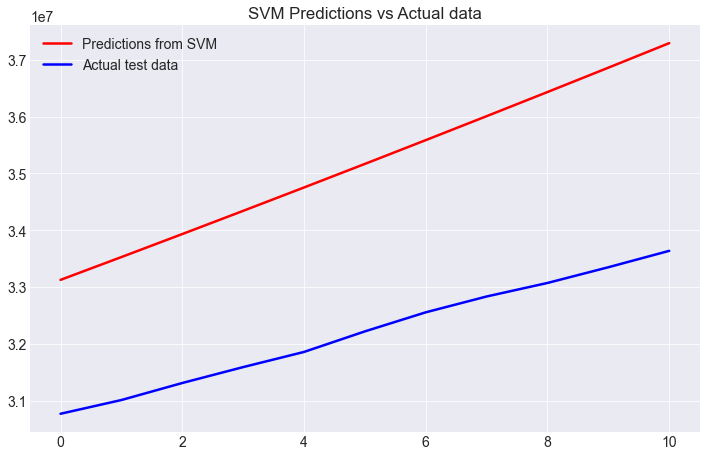

In [43]:
plt.figure(figsize=(12,7.5))
plt.plot(svmTestPredict, 'r', lw=2.5)
plt.plot(yTestConfirmed, 'b', lw=2.5)
plt.title("SVM Predictions vs Actual data")
plt.legend(['Predictions from SVM', 'Actual test data'])

Clearly in the graph for SVM, it is visible that the model is overestimating the predictions.

In [25]:
print("Mean Absolute Error: ", mean_absolute_error(svmTestPredict, yTestConfirmed))
print("Mean Squared  Error: ", mean_squared_error(svmTestPredict, yTestConfirmed))

Mean Absolute Error:  2976475.4344693003
Mean Squared  Error:  9014904448229.477


Trying _**Polynomial Regression**_ next.
# Polynomial Regression

In [26]:
# data fit and transformed for Polynomial Regression
poly = PolynomialFeatures(degree=5)
polyXTrainConfirmed = poly.fit_transform(xTrainConfirmed)
polyXTestConfirmed = poly.fit_transform(xTestConfirmed)
polyFutureForecast = poly.fit_transform(futureForecast)

In [27]:
linearModel = LinearRegression(normalize=True, fit_intercept=False)
linearModel.fit(polyXTrainConfirmed, yTrainConfirmed)
polyFuturePredict = linearModel.predict(polyFutureForecast)
polyTestPredict = linearModel.predict(polyXTestConfirmed)

In [28]:
print(linearModel.coef_)

[[ 1.53048537e+06 -1.81655497e+05  4.74253636e+03 -4.48653052e+01
   2.07240568e-01 -3.37052858e-04]]


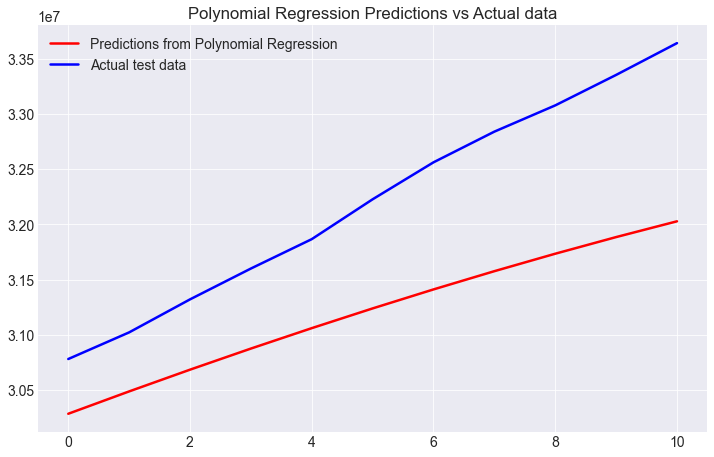

In [44]:
plt.figure(figsize=(12,7.5))
plt.plot(polyTestPredict, 'r', lw=2.5)
plt.plot(yTestConfirmed, 'b', lw=2.5)
plt.title("Polynomial Regression Predictions vs Actual data")
plt.legend(['Predictions from Polynomial Regression', 'Actual test data'])

Clearly in the graph for polynomial regression, it is visible that the model is underestimating the predictions.

In [30]:
print("Mean Absolute Error: ", mean_absolute_error(polyTestPredict, yTestConfirmed))
print("Mean Squared  Error: ", mean_squared_error(polyTestPredict, yTestConfirmed))

Mean Absolute Error:  1002386.240217599
Mean Squared  Error:  1143199579370.2292


Trying _**Bayesian Ridge Polynomial Regression**_ next.
# Bayesian Ridge Polynomial Regression

In [32]:
# data fit and transformed for Bayesian Ridge
bayesianPoly = PolynomialFeatures(degree=5)
bayesianPolyXTrainConfirmed = bayesianPoly.fit_transform(xTrainConfirmed)
bayesianPolyXTestConfirmed = bayesianPoly.fit_transform(xTestConfirmed)
bayesianPolyFutureForecast = bayesianPoly.fit_transform(futureForecast)

In [37]:
# bayesian ridge polynomial regression
tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
normalize = [True, False]

bayesianGrid = {'tol': tol, 'alpha_1': alpha1, 'alpha_2' : alpha2, 'lambda_1': lambda1, 'lambda_2' : lambda2, 
                 'normalize' : normalize}

bayesian = BayesianRidge(fit_intercept=False)
bayesianSearch = RandomizedSearchCV(bayesian, bayesianGrid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesianSearch.fit(bayesianPolyXTrainConfirmed, yTrainConfirmed)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    2.1s finished
C:\Users\Siddhant\Anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


RandomizedSearchCV(cv=3, estimator=BayesianRidge(fit_intercept=False),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'alpha_1': [1e-07, 1e-06, 1e-05, 0.0001,
                                                    0.001],
                                        'alpha_2': [1e-07, 1e-06, 1e-05, 0.0001,
                                                    0.001],
                                        'lambda_1': [1e-07, 1e-06, 1e-05,
                                                     0.0001, 0.001],
                                        'lambda_2': [1e-07, 1e-06, 1e-05,
                                                     0.0001, 0.001],
                                        'normalize': [True, False],
                                        'tol': [1e-06, 1e-05, 0.0001, 0.001,
                                                0.01]},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [38]:
bayesianSearch.best_params_

{'tol': 0.001,
 'normalize': False,
 'lambda_2': 1e-06,
 'lambda_1': 0.001,
 'alpha_2': 0.001,
 'alpha_1': 1e-07}

In [39]:
bayesianConfirmed = bayesianSearch.best_estimator_
bayesianTestPredict = bayesianConfirmed.predict(bayesianPolyXTestConfirmed)
bayesianFuturePredict = bayesianConfirmed.predict(bayesianPolyFutureForecast)

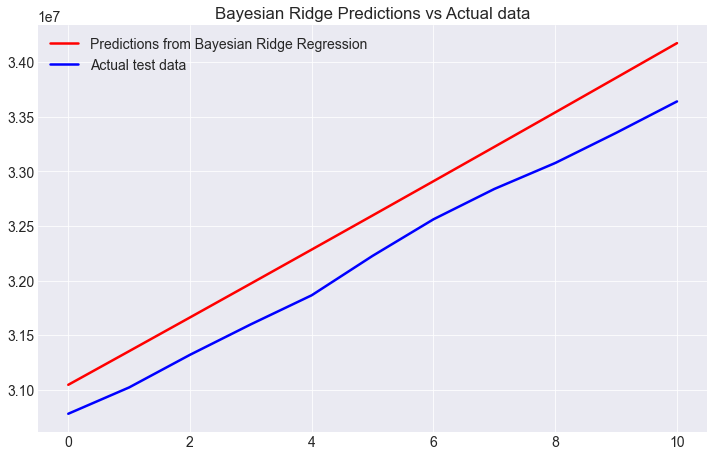

In [46]:
plt.figure(figsize=(12,7.5))
plt.plot(bayesianTestPredict, 'r', lw=2.5)
plt.plot(yTestConfirmed, 'b', lw=2.5)
plt.title("Bayesian Ridge Predictions vs Actual data")
plt.legend(['Predictions from Bayesian Ridge Regression', 'Actual test data'])

Clearly in the graph for bayesian ridge polynomial regression, it is visible that the model is overestimating the predictions. However, the prediction is more accurate when compared to SVM and also, Polynomial Regression. ie. Error is lowered in Bayesian Ridge predictions.

In [41]:
print("Mean Absolute Error: ", mean_absolute_error(bayesianTestPredict, yTestConfirmed))
print("Mean Squared  Error: ", mean_squared_error(bayesianTestPredict, yTestConfirmed))

Mean Absolute Error:  394403.4146701101
Mean Squared  Error:  161315266098.47107


# Taking a look at graphs for confirmed cases, deaths, active cases, recoveries and averages

In [43]:
adjustedDates = adjustedDates.reshape(1,-1)[0]
# print(adjustedDates)

In [44]:
colorsList = ['#ffd480','#ffa64d','#ff944d']
stylesList = plt.style.available
plt.style.use(stylesList[-2])

## Graph of confirmed cases of COVID-19

Text(0.5, 1.0, 'Number of cases of COVID-19 Worldwide')

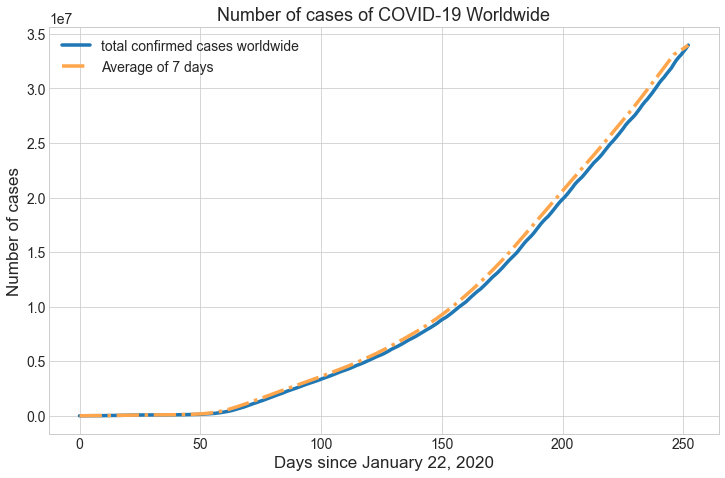

In [45]:
plt.figure(figsize=(12,7.5))
plt.plot(adjustedDates, casesWorldwide, lw=3.5, label="total confirmed cases worldwide")
plt.plot(adjustedDates, confirmedAvg, lw=3.5, color=colorsList[1], ls='-.', label=f"Average of {window} days")
# plt.legend(prop={'size':15})
plt.legend()
plt.xlabel("Days since January 22, 2020", size=17)
plt.ylabel("Number of cases", size=17)
plt.title("Number of cases of COVID-19 Worldwide", size=18)

## Graph of deaths due to COVID-19

Text(0.5, 1.0, 'Number of deaths due to COVID-19 Worldwide')

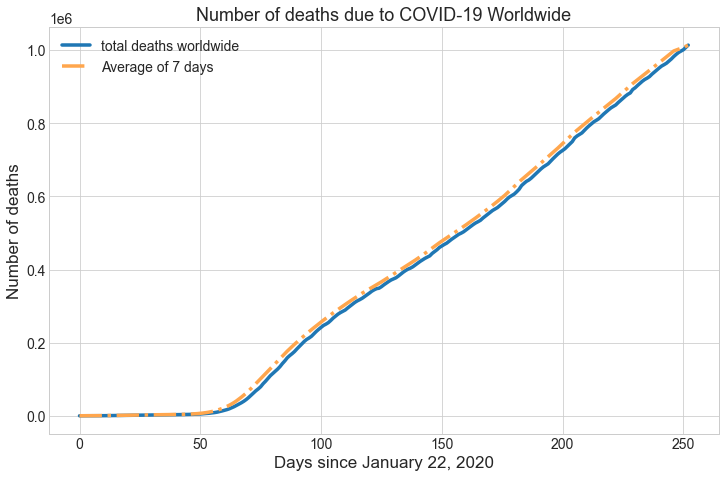

In [46]:
plt.figure(figsize=(12,7.5))
plt.plot(adjustedDates, deathsTotal, lw=3.5, label="total deaths worldwide")
plt.plot(adjustedDates, deathsAvg, lw=3.5, color=colorsList[1], ls='-.', label=f"Average of {window} days")
# plt.legend(prop={'size':15})
plt.legend()
plt.xlabel("Days since January 22, 2020", size=17)
plt.ylabel("Number of deaths", size=17)
plt.title("Number of deaths due to COVID-19 Worldwide", size=18)

## Graph of recoveries from COVID-19

Text(0.5, 1.0, 'Number of recoveries from COVID-19 Worldwide')

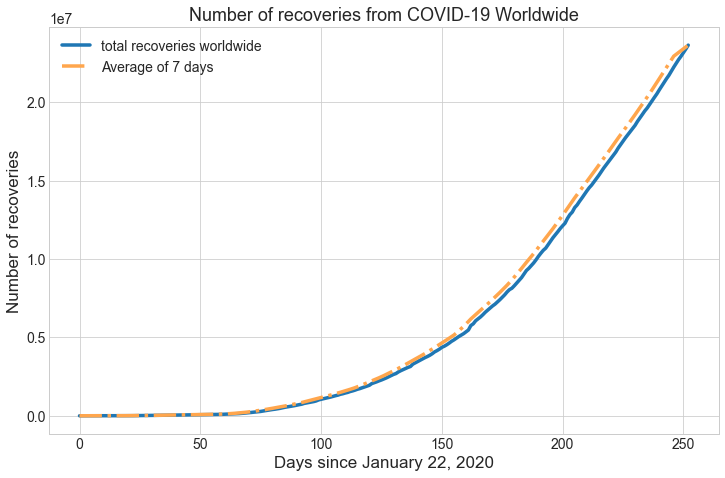

In [47]:
plt.figure(figsize=(12,7.5))
plt.plot(adjustedDates, totalRecoveries, lw=3.5, label="total recoveries worldwide")
plt.plot(adjustedDates, recoveriesAvg, lw=3.5, color=colorsList[1], ls='-.', label=f"Average of {window} days")
# plt.legend(prop={'size':15})
plt.legend()
plt.xlabel("Days since January 22, 2020", size=17)
plt.ylabel("Number of recoveries", size=17)
plt.title("Number of recoveries from COVID-19 Worldwide", size=18)

## Graph of active cases of COVID-19

Text(0.5, 1.0, 'Number of active cases of COVID-19 Worldwide')

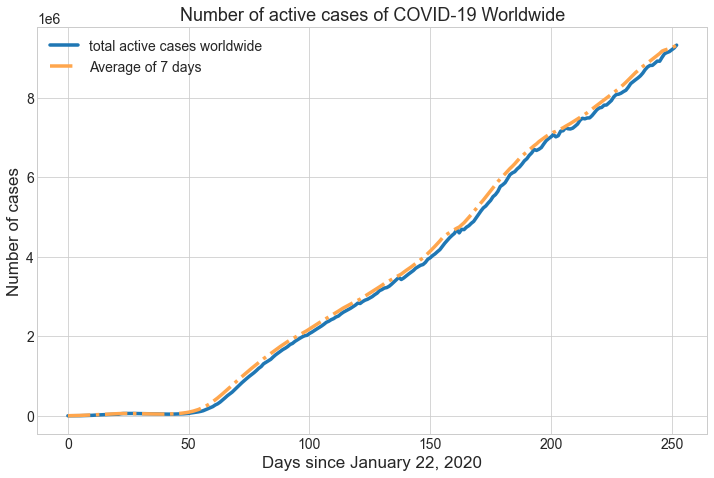

In [48]:
plt.figure(figsize=(12,7.5))
plt.plot(adjustedDates, totalActive, lw=3.5, label="total active cases worldwide")
plt.plot(adjustedDates, activeAvg, lw=3.5, color=colorsList[1], ls='-.', label=f"Average of {window} days")
# plt.legend(prop={'size':15})
plt.legend()
plt.xlabel("Days since January 22, 2020", size=17)
plt.ylabel("Number of cases", size=17)
plt.title("Number of active cases of COVID-19 Worldwide", size=18)